In [13]:
import pandas as pd

# 파일 경로
file_path = "./BigGraphRaw/20241012_시사경제용어사전.xlsx"

# 데이터 불러오기
data = pd.read_excel(file_path)

# 데이터 확인
print("데이터프레임:")
print(data.head())


#개선 사항:
# 개선/추가 제안
# 데이터 구조 파악:

# data.info()를 호출해 전체 데이터의 컬럼, 데이터 타입, 결측치 등을 확인하는 것이 좋습니다.
# 결측치 처리:

# 데이터셋이 완전하지 않을 경우, 결측값을 확인하고 처리 전략을 세워야 합니다.
# python
# 코드 복사
# print(data.isnull().sum())
# 컬럼 이름 명확화:

# 현재 컬럼명이 한글로 되어 있어 처리 시 오류가 발생할 가능성이 있습니다. 컬럼명을 변경하면 더 효율적으로 작업할 수 있습니다.
# python
# 코드 복사
# data.rename(columns={"순번": "Index", "주제": "Category", "용어": "Term", "설명": "Description"}, inplace=True)
# 데이터 저장:

# 가공된 데이터를 새로운 파일로 저장할 준비가 필요하다면, 다음 코드를 사용할 수 있습니다.
# python
# 코드 복사
# data.to_csv("./processed_data.csv", index=False)

데이터프레임:
   순번  주제                       용어  \
0   1  사회                  0.5인 가구   
1   2  경영                  1인 창조기업   
2   3  경제                 1인당 국민소득   
3   4  과학              20-20-20 계획   
4   5  금융  2차 시장(Secondary Market)   

                                                  설명  
0  싱글족 가운데 두 곳 이상에 거처를 두거나 잦은 여행과 출장 등으로 오랫동안 집을 ...  
1  개인이 사장이면서 직원인 기업을 의미한다. 자신이 가진 '지식, 경험, 기술' 등을...  
2  국민소득을 총국민 수로 나눈 값. 해당 국가의 소득 수준을 보여주는 가장 대표적인 ...  
3  유럽연합(EU)이 2020년까지 온실가스 20% 감축, 에너지효율 20% 개선, 신...  
4  2차 시장은 처음 발행된 증권, 채권 등이 거래되는 발행시장과 구분되며, 이미 발행...  


In [2]:
# 설명 열 제외
graph_data = data[["순번", "주제", "용어"]].rename(columns={"순번": "node_id", "주제": "topic", "용어": "word"})

# 데이터 확인
print("그래프 데이터:")
print(graph_data.head())


그래프 데이터:
   node_id topic                     word
0        1    사회                  0.5인 가구
1        2    경영                  1인 창조기업
2        3    경제                 1인당 국민소득
3        4    과학              20-20-20 계획
4        5    금융  2차 시장(Secondary Market)


In [3]:
node_set = set(graph_data["word"])  # 모든 노드를 집합으로 정리
#graph_data["word"]에서 모든 용어를 추출하고, 중복을 제거하기 위해 set()으로 변환
#결과적으로 그래프에 사용할 유일한 노드 집합이 생성

topic_set = set(graph_data["topic"])  # 관계 주제를 집합으로 정리
# graph_data["topic"]에서 모든 주제(topic)를 추출하고 중복을 제거
# 이는 엣지를 생성할 때 특정 주제를 기준으로 그룹화하는 데 사용

edges = []  # 엣지 리스트
# source: 엣지의 시작 노드.
# target: 엣지의 끝 노드.
# relation: 두 노드 간 관계를 나타내는 주제.

# 같은 topic(주제)을 공유하는 노드끼리 연결
for topic in topic_set: #각 주제(topic)에 대해 반복
    # 해당 topic에 속하는 노드들 추출
    topic_nodes = graph_data[graph_data["topic"] == topic]["word"].tolist()
    
    #선택된 노드 리스트에서 모든 가능한 노드 쌍을 생성하기 위해 중첩 반복문을 사용
    for i in range(len(topic_nodes)):
        for j in range(i + 1, len(topic_nodes)):
            edges.append((topic_nodes[i], topic_nodes[j], topic))  # (source, target, relation)
            #각 노드 쌍에 대해 엣지를 생성하고, 엣지 리스트에 추가
# 결과 확인
print(f"생성된 노드 수: {len(node_set)}")
print(f"생성된 엣지 수: {len(edges)}")


생성된 노드 수: 3031
생성된 엣지 수: 947585


In [4]:
# 노드와 관계를 ID로 매핑
node2id = {word: i for i, word in enumerate(node_set)}
# node_set(노드 이름의 집합)을 반복하면서 각 노드에 고유한 ID를 부여
# 결과적으로 노드 이름 -> ID로 매핑된 딕셔너리가 생성
# 예: {"word1": 0, "word2": 1, "word3": 2, ...}

topic2id = {topic: i for i, topic in enumerate(topic_set)}
# topic_set(주제 이름의 집합)을 반복하면서 각 주제에 고유한 ID를 부여
# 결과적으로 주제 -> ID로 매핑된 딕셔너리가 생성
# 예: {"topic1": 0, "topic2": 1, "topic3": 2, ...}

# 매핑 결과 확인
print(f"노드 매핑 (예): {list(node2id.items())[:5]}")
print(f"주제 매핑 (예): {list(topic2id.items())[:5]}")


노드 매핑 (예): [('COMESA(Common Market for Eastern and Southern Africa)', 0), ('지방세', 1), ('자산유동화증권(ABS: Asset Backed Securities)', 2), ('부외거래(簿外去來, Off Balance Sheet Engagement)', 3), ('그린라운드', 4)]
주제 매핑 (예): [('공공', 0), ('금융', 1), ('경영', 2), ('경제', 3), ('과학', 4)]


In [5]:
from torch_geometric.data import HeteroData
import torch

# HeteroData 객체 생성
hetero_data = HeteroData()  # PyTorch Geometric의 HeteroData 객체 초기화 (이질적 그래프를 표현)

# 노드 추가 (One-hot Encoding 사용)
hetero_data['word'].x = torch.eye(len(node2id))  # 노드 특징: 각 노드 ID를 One-hot Encoding으로 표현
# torch.eye(len(node2id))는 len(node2id) x len(node2id) 크기의 단위 행렬을 생성하여 각 노드에 고유한 One-hot 벡터를 부여

# 엣지 추가
edge_index = torch.tensor(
    [(node2id[src], node2id[dst]) for src, dst, _ in edges], dtype=torch.long
).t().contiguous()  # 엣지 연결 정보 생성
# [(node2id[src], node2id[dst]) for src, dst, _ in edges]: edges 리스트에서 출발 노드(src)와 도착 노드(dst)를 정수 ID로 변환
# .t(): (2, N) 형식으로 전치하여 첫 번째 행은 출발 노드, 두 번째 행은 도착 노드를 나타냄
# .contiguous(): 데이터의 메모리 연속성을 보장

edge_attr = torch.tensor(
    [topic2id[relation] for _, _, relation in edges], dtype=torch.long
)  # 관계 속성 추가
# [topic2id[relation] for _, _, relation in edges]: 각 엣지의 관계(주제)를 ID로 변환하여 텐서로 저장

# HeteroData 객체에 엣지 정보 추가
hetero_data['word', 'relation', 'word'].edge_index = edge_index  # 엣지 연결 정보 추가
hetero_data['word', 'relation', 'word'].edge_attr = edge_attr  # 엣지 속성(관계 ID) 추가

# 데이터 확인
print(hetero_data)  # HeteroData 객체의 구조 출력 (노드와 엣지 정보 요약)


HeteroData(
  word={ x=[3031, 3031] },
  (word, relation, word)={
    edge_index=[2, 947585],
    edge_attr=[947585]
  }
)


In [6]:
# 실제 엣지
edge_label_index = hetero_data['word', 'relation', 'word'].edge_index
# edge_label_index: HeteroData 객체의 'relation' 관계를 가지는 실제 엣지 연결 정보
# edge_index는 (2, N) 크기의 텐서로, 각 열은 (source, target) 노드 쌍을 나타냄

edge_label = torch.ones(edge_label_index.size(1))  # 실제 엣지의 라벨은 1
# torch.ones(edge_label_index.size(1)): 모든 엣지에 대해 라벨 값을 1로 초기화
# 크기는 엣지 개수 (edge_index의 열 개수)와 동일하며, 실제 연결된 엣지를 나타내는 정답 라벨로 사용

# 결과 확인
print(f"Edge Label Index Shape: {edge_label_index.shape}")
# edge_label_index.shape: 엣지 연결 정보를 나타내는 텐서의 크기 출력 (예: [2, N], 여기서 N은 엣지 개수)

print(f"Edge Label Shape: {edge_label.shape}")
# edge_label.shape: 실제 엣지 라벨 텐서의 크기 출력 (예: [N], 여기서 N은 엣지 개수)


Edge Label Index Shape: torch.Size([2, 947585])
Edge Label Shape: torch.Size([947585])


In [7]:
from torch_geometric.utils import negative_sampling

# 네거티브 엣지 생성
neg_edge_index = negative_sampling(
    edge_label_index,  # 실제 엣지 연결 정보
    num_nodes=hetero_data['word'].x.size(0),  # 전체 노드 수
    num_neg_samples=edge_label_index.size(1)  # 생성할 네거티브 엣지 수 (실제 엣지 수와 동일하게 설정)
)
# negative_sampling: 그래프에서 실제로 연결되지 않은 노드 쌍(부정 엣지)을 샘플링
# edge_label_index: 실제 엣지 정보 (양성 엣지)로부터 네거티브 샘플을 생성
# num_nodes: 노드의 총 개수 (전체 노드 집합에서 무작위 샘플링)
# num_neg_samples: 생성할 네거티브 엣지의 개수

neg_edge_label = torch.zeros(neg_edge_index.size(1))  # 부정 엣지의 라벨은 0
# torch.zeros(neg_edge_index.size(1)): 모든 부정 엣지에 대해 라벨 값을 0으로 설정
# 크기는 neg_edge_index의 열 개수 (네거티브 엣지 개수)와 동일

# 결과 확인
print(f"Negative Edge Index Shape: {neg_edge_index.shape}")
print(f"Negative Edge Label Shape: {neg_edge_label.shape}")

Negative Edge Index Shape: torch.Size([2, 947585])
Negative Edge Label Shape: torch.Size([947585])


In [8]:
# 엣지 인덱스 및 라벨 통합
total_edge_index = torch.cat([edge_label_index, neg_edge_index], dim=1)
# torch.cat([...], dim=1): 실제 엣지와 네거티브 엣지의 인덱스를 열 방향으로 연결
# 결과는 [2, N] 크기의 텐서로, N은 실제 엣지와 네거티브 엣지의 총 개수

total_edge_label = torch.cat([edge_label, neg_edge_label], dim=0)
# torch.cat([...], dim=0): 실제 엣지 라벨(1)과 네거티브 엣지 라벨(0)을 하나의 벡터로 결합
# 결과는 [N] 크기의 텐서로, N은 실제 엣지와 네거티브 엣지의 총 개수

# 결과 확인
print(f"Total Edge Index Shape: {total_edge_index.shape}")
print(f"Total Edge Label Shape: {total_edge_label.shape}")

Total Edge Index Shape: torch.Size([2, 1895170])
Total Edge Label Shape: torch.Size([1895170])


In [9]:
import torch
from torch import nn
from torch_geometric.nn import HANConv

# HAN 기반 링크 예측 모델 정의
class HANLinkPredictor(nn.Module):
    def __init__(self, dim_in, dim_out, dim_h=128, heads=8):
        super().__init__()
        # HANConv: 이질적 그래프에서 노드 임베딩을 학습하는 GNN 레이어
        self.han = HANConv(dim_in, dim_h, heads=heads, dropout=0.6, metadata=hetero_data.metadata())
        # nn.Linear: 두 노드 임베딩을 기반으로 엣지 존재 여부를 예측
        self.edge_predictor = nn.Linear(dim_h * 2, dim_out)  # 두 노드의 임베딩을 결합하여 출력 차원 생성

    def forward(self, x_dict, edge_index_dict, edge_label_index):
        # HANConv로 노드 임베딩 생성
        h_dict = self.han(x_dict, edge_index_dict)  # 각 노드 타입별로 학습된 임베딩 반환

        # Edge의 양 노드 임베딩 결합
        edge_emb = torch.cat([
            h_dict['word'][edge_label_index[0]],  # 엣지의 시작 노드 임베딩
            h_dict['word'][edge_label_index[1]]   # 엣지의 도착 노드 임베딩
        ], dim=-1)  # [num_edges, dim_h * 2] 형태로 결합

        # 엣지 예측
        return self.edge_predictor(edge_emb)  # [num_edges, dim_out] 형태의 결과 반환


In [10]:
# 모델 초기화
dim_in = hetero_data['word'].x.size(1)  # 입력 특징 차원 (3031, One-hot Encoding)
# dim_in: 한 노드의 입력 피처 크기. 여기서는 One-hot Encoding으로 3031차원.

dim_out = 1  # 출력: 링크 여부 (1 또는 0)
# dim_out: 출력 차원. 1차원 스칼라 값으로 링크의 존재 여부를 예측.

model = HANLinkPredictor(dim_in, dim_out)
# HANLinkPredictor 모델 초기화:
# - 입력 차원 dim_in
# - 출력 차원 dim_out

# 손실 함수와 옵티마이저
criterion = nn.BCEWithLogitsLoss()  # 바이너리 분류 손실 함수
# nn.BCEWithLogitsLoss: 이진 분류를 위한 손실 함수.
# - 출력이 로짓 값(시그모이드 적용 전)일 때 사용.
# - 자동으로 시그모이드 변환과 BCE 손실 계산을 포함.

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
# torch.optim.Adam: Adam 옵티마이저를 사용하여 모델 매개변수 업데이트.
# - lr=0.01: 학습률.
# - weight_decay=5e-4: 가중치 감쇠(L2 정규화)로 과적합 방지.


Epoch 0/50, Loss: 0.6933, Accuracy: 0.5000
Epoch 10/50, Loss: 0.6580, Accuracy: 0.5135
Epoch 20/50, Loss: 0.6071, Accuracy: 0.5775
Epoch 30/50, Loss: 0.5798, Accuracy: 0.6149
Epoch 40/50, Loss: 0.5647, Accuracy: 0.6271
Epoch 49/50, Loss: 0.5568, Accuracy: 0.6411
모델 학습 완료


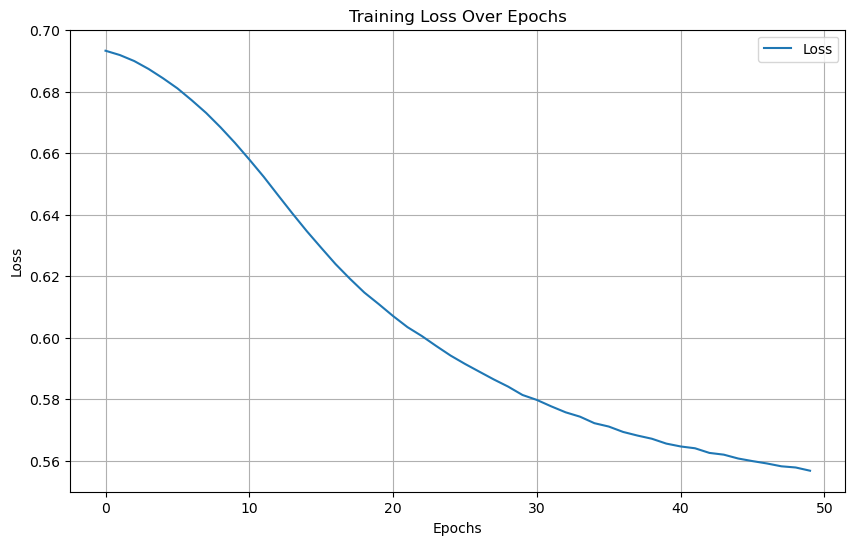

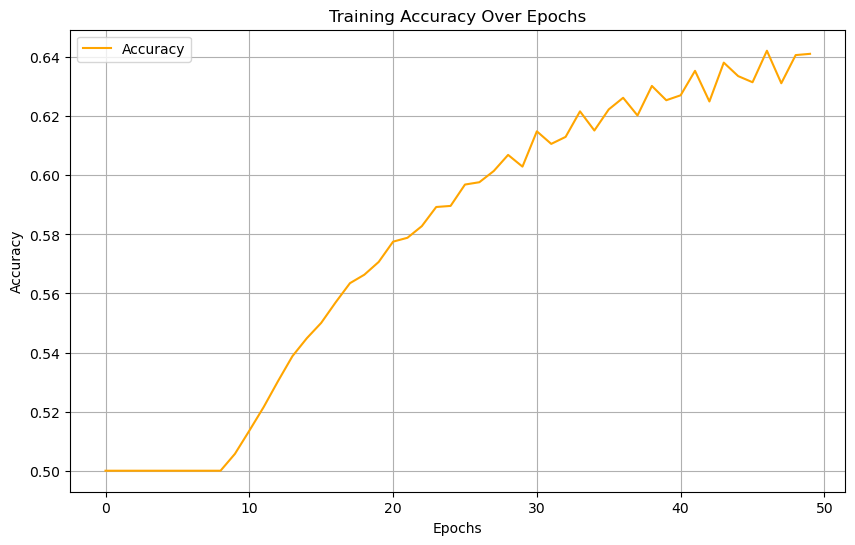

In [12]:
import matplotlib.pyplot as plt

# 학습 루프 설정
epochs = 50  # 총 학습 에포크 수
losses = []  # 손실 값을 저장할 리스트
accuracies = []  # 에포크별 정확도를 저장할 리스트

model.train()  # 모델을 학습 모드로 전환
for epoch in range(epochs):
    optimizer.zero_grad()  # 옵티마이저의 그래디언트를 초기화
    # 모델 예측
    pred = model(hetero_data.x_dict, hetero_data.edge_index_dict, total_edge_index)
    # 손실 계산
    loss = criterion(pred.view(-1), total_edge_label)  # BCEWithLogitsLoss를 사용한 손실 계산
    losses.append(loss.item())  # 손실 값을 리스트에 저장

    # 역전파 및 최적화
    loss.backward()  # 그래디언트 계산
    optimizer.step()  # 옵티마이저로 매개변수 업데이트

    # 평가 모드에서 정확도 계산
    model.eval()  # 모델을 평가 모드로 전환
    with torch.no_grad():  # 그래디언트 비활성화
        pred = model(hetero_data.x_dict, hetero_data.edge_index_dict, total_edge_index)
        pred_label = (pred.view(-1) > 0.5).float()  # 0.5를 기준으로 클래스화
        accuracy = (pred_label == total_edge_label).sum().item() / total_edge_label.size(0)  # 정확도 계산
        accuracies.append(accuracy)  # 정확도 값을 리스트에 저장
    model.train()  # 다시 학습 모드로 전환

    # 10 에포크마다 손실 및 정확도 출력
    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")

print("모델 학습 완료")

# 손실 그래프
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), losses, label="Loss")  # 손실 값 플롯
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")  # 그래프 제목
plt.legend()
plt.grid()
plt.show()

# 정확도 그래프
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), accuracies, label="Accuracy", color="orange")  # 정확도 값 플롯
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Over Epochs")  # 그래프 제목
plt.legend()
plt.grid()
plt.show()

# Mean Squared Error (MSELoss) 예시:
# criterion = nn.MSELoss()  # 손실 함수를 MSE로 변경할 경우


In [22]:
# 첫 5개의 엣지 예측 결과 확인
with torch.no_grad():  # 그래디언트 계산 비활성화
    # 모델 예측 수행
    pred = model(hetero_data.x_dict, hetero_data.edge_index_dict, total_edge_index)
    
    # 첫 5개의 엣지에 대해 결과 출력
    for i in range(5):
        print(f"Edge {total_edge_index[0, i]} -> {total_edge_index[1, i]}, "  # 엣지의 연결 정보 출력
              f"Prediction: {torch.sigmoid(pred[i]).item():.4f}, "  # 시그모이드 함수를 적용한 예측값 (확률)
              f"Label: {int(total_edge_label[i].item())}")  # 실제 라벨 (1: 실제 엣지, 0: 네거티브 엣지)


Edge 1806 -> 319, Prediction: 0.0665, Label: 1
Edge 1806 -> 1198, Prediction: 0.0717, Label: 1
Edge 1806 -> 2340, Prediction: 0.0785, Label: 1
Edge 1806 -> 2532, Prediction: 0.0837, Label: 1
Edge 1806 -> 1571, Prediction: 0.0901, Label: 1


여기까지 학습

______